# 통계분석(빈도주의적 관점 vs 베이지안적 관점)
# 그룹분석

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tips=sns.load_dataset('tips') # tips 패키지 불러오기
print(tips)
print('\n')
print(tips.dtypes) # 데이터 형 확인
print('\n')
tips.info() # 데이터형 확인
print('\n')
print(tips.shape) # 데이터형 확인 
print('\n')
tips.isnull().sum() #변수별 결측치 확인
print('\n')
tips.describe() # 수치형 자료 요약통계량

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Colu

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 범주형 변수: sex,smoker,day,time
# 빈도분석

## 식당에서 식사 후 내는 팁(tip)과 관련된 데이터

## total_bill: 식사대금

## tip: 팁

## sex: 성별

## smoker: 흡연/금연 여부

## day: 요일

## time: 시간

## size: 인원

In [6]:
tips.sex.value_counts() # 성별 빈도분석
tips['sex'].value_counts() # 같은결과 tips 내 성별 열 지정
tips.groupby('sex').count() # 성별을 기준으로 하여 각 변수들의 값
tips.groupby('sex').size() # 카운트는 결측치 포함하지 않음 사이즈는 포함

sex
Male      157
Female     87
dtype: int64

In [7]:
tips['time'].value_counts()
tips.groupby('time').count()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Lunch,68,68,68,68,68,68
Dinner,176,176,176,176,176,176


In [26]:
tips.groupby('smoker').size()

smoker
Yes     93
No     151
dtype: int64

In [28]:
tips.groupby('day').size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [30]:
tips.groupby('time').size()

time
Lunch      68
Dinner    176
dtype: int64

# 교차분석

In [39]:
pd.crosstab(tips.sex,tips.smoker,margins=True) # margins를 이용하여 주변합구하기
pd.crosstab(tips['sex'],tips['smoker'],margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [41]:
tips.groupby(['sex','smoker']).size()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

In [51]:
pd.crosstab(tips.day,tips.tip,margins=True) #토요일에 팁의 빈도가 더 잦음

tip,1.0,1.01,1.1,1.17,1.25,1.32,1.36,1.44,1.45,1.47,...,5.85,5.92,6.0,6.5,6.7,6.73,7.58,9.0,10.0,All
day,,,,,,,,,,,,,,,,,,,,,
Thur,0,0,0,0,1,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,62
Fri,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
Sat,3,0,1,1,2,0,0,1,1,1,...,0,1,0,1,0,1,1,1,1,87
Sun,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,76
All,4,1,1,1,3,1,1,2,1,1,...,1,1,1,2,1,1,1,1,1,244


In [46]:
pd.crosstab(tips.time,tips.size) #dinner가 더 사람많음

col_0,1708
time,
Lunch,68
Dinner,176


In [55]:
pd.crosstab(tips.total_bill,tips.sex,margins=True) #남자의 대금 지불이 더 많음

sex,Male,Female,All
total_bill,,,
3.07,0,1,1
5.75,0,1,1
7.25,1,1,2
7.51,1,0,1
7.56,1,0,1
...,...,...,...
48.17,1,0,1
48.27,1,0,1
48.33,1,0,1


# 시각화

<AxesSubplot:>

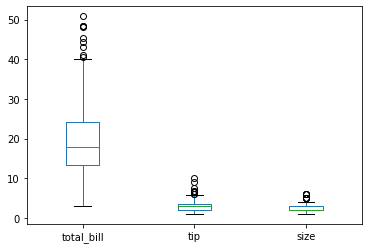

In [56]:
tips.plot(kind='box')

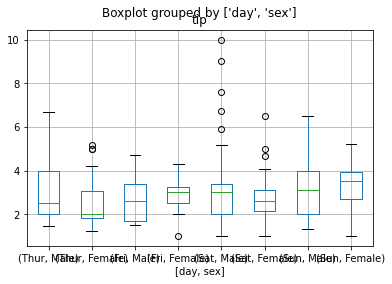

In [58]:
tips.boxplot(column=['tip'],by=['day','sex'])
plt.show() #boxplot 시각화 범주+ 연속

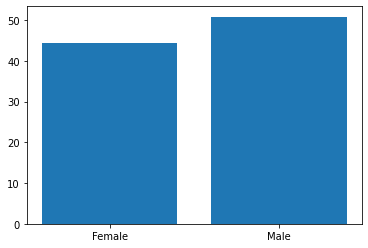

In [62]:
plt.bar(tips.sex,tips.total_bill)
plt.show() # bar chart 시각화 범주 + 연속

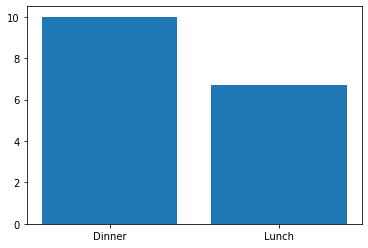

In [64]:
plt.bar(tips.time,tips.tip)
plt.show() #저녁에 팁이 더 많음

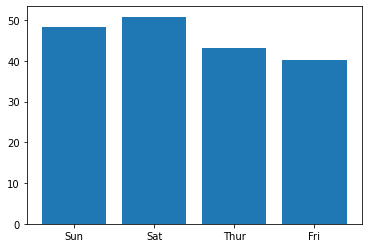

In [69]:
plt.bar(tips.day,tips.total_bill)
plt.show() # 토요일이 더 지불이 많음

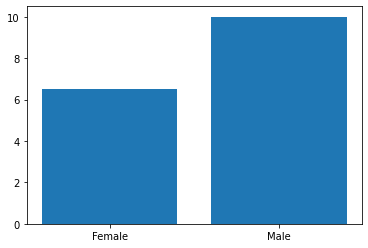

In [71]:
plt.bar(tips.sex,tips.tip)
plt.show() # 남자의 팁 지불률이 더 높음

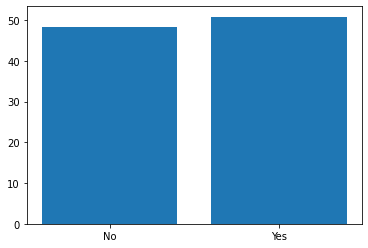

In [73]:
plt.bar(tips.smoker,tips.total_bill)
plt.show() # 흡연자의 대금 지불률이 더 높음

# 산점도

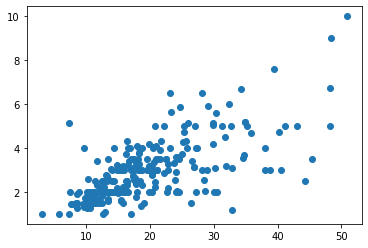

In [76]:
plt.scatter(tips.total_bill,tips.tip)
plt.show() #  대부분 대금지불이 낮은 곳에서 팁 지급률이 높은 빈도를 띄며 대금지불이 늘어날수록 팁 지급률 빈도가 낮아짐
#하지만 그저 증가율로본다면 대급지불률이 높아질수록 팁이 높아짐  연속형 + 연속형

# 상관계수

In [90]:
tipc=tips.corr()

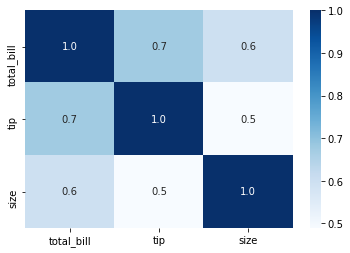

In [113]:
sns.heatmap(tips.corr(), annot=True, cmap='Blues',fmt='.1f') # fmt를 이용하여 소숫점 자리 표현
plt.show()

In [96]:
np.corrcoef(tips['total_bill'],tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

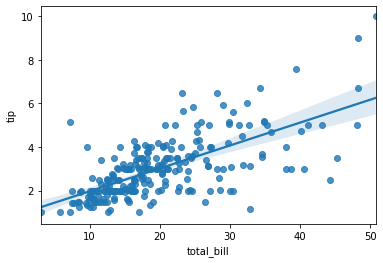

In [100]:
sns.regplot(x='total_bill',y='tip',data=tips)
plt.show()

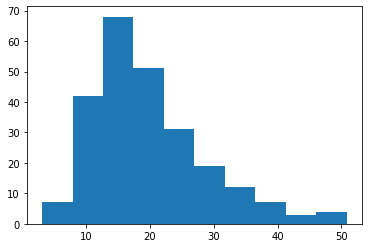

In [107]:
plt.hist(tips.total_bill)
plt.show()

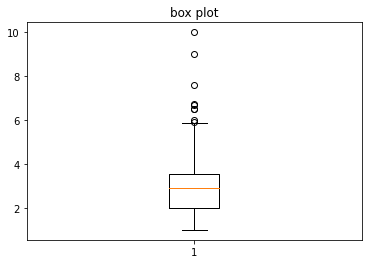

In [114]:
plt.boxplot(tips.tip)
plt.title('box plot')
plt.show()

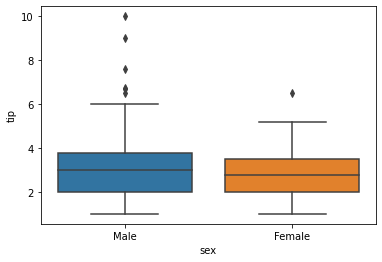

In [116]:
sns.boxplot(x=tips.sex,y=tips.tip)
plt.show()

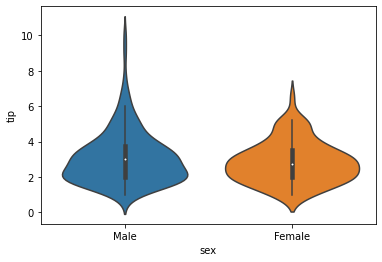

In [118]:
sns.violinplot(x='sex',y='tip',data=tips) #커널밀도함수 범주+연속
plt.show()

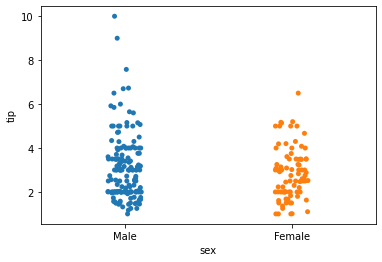

In [125]:
sns.stripplot(x='sex',y='tip',data=tips) # 범주+연속
plt.show()

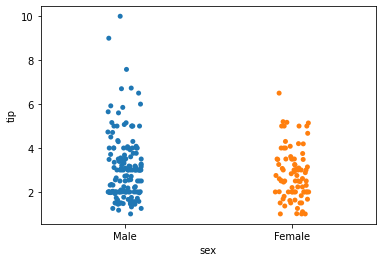

In [126]:
sns.stripplot(x='sex',y='tip',data=tips,jitter=True) # 범주+연속
plt.show()

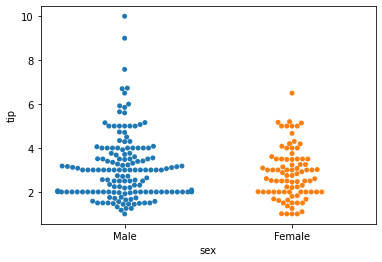

In [123]:
sns.swarmplot(x='sex',y='tip',data=tips) # 겹쳐진 부분을 흐트러짐(jitter)를 이용하여 시각화
plt.show()

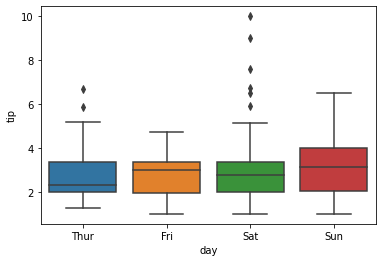

In [127]:
sns.boxplot(x='day',y='tip',data=tips)
plt.show()

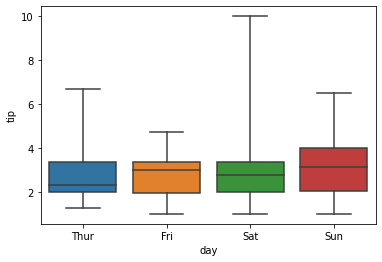

In [129]:
sns.boxplot(x='day',y='tip',data=tips,whis=np.inf)
# 범위를 무한대로 늘려줌으로써 이상점을 안보이게 함 하지만 없어진게 아니라 포함되어 보임
plt.show()

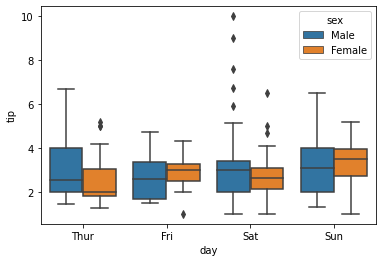

In [131]:
sns.boxplot(x='day',y='tip',data=tips,hue='sex') # 성별을 기준으로 보여줌 위에 레전드 텍스트 값 표시
plt.show()

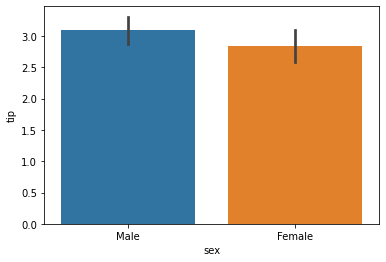

In [133]:
sns.barplot(x=tips.sex,y=tips.tip) # seaborn을 이용한 막대그래프에서 위에 막대로 표준오차를 표시
plt.show()

In [135]:
tips.groupby('sex').mean()[['tip']]

,tip
sex,
Male,3.089618
Female,2.833448


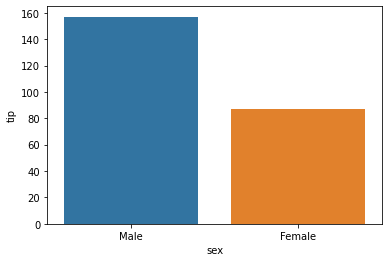

In [137]:
sns.barplot(x=tips.sex,y=tips.tip,estimator=len)
plt.show()

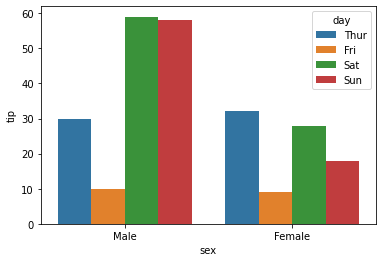

In [139]:
sns.barplot(x='sex',y='tip',estimator=len,hue='day',data=tips)
plt.show()

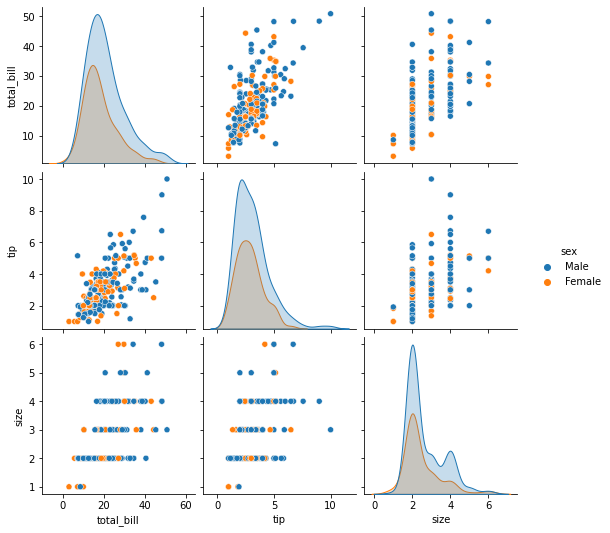

In [144]:
sns.pairplot(tips,hue='sex') # hue를 이용하여 분류 기준변수 정해주기
plt.show()

# 문제 tip자료를 이용하여 식사대금 대비 팁의 비율이 어떤 경우에 가장 높아지는 지 계산 및 찾기

In [243]:
tips['rate']=tips['tip']/tips['total_bill']

In [258]:
print(tips)

     total_bill   tip     sex smoker   day    time  size      rate
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
..          ...   ...     ...    ...   ...     ...   ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3  0.203927
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222
242       17.82  1.75    Male     No   Sat  Dinner     2  0.098204
243       18.78  3.00  Female     No  Thur  Dinner     2  0.159744

[244 rows x 8 columns]


# 상위 5개로 보았을 때 성별: 남성,흡연여부: 흡연자, 요일: 일요일, 시간대: 저녁, 인원:2명 이 비율이 높은 것에 대한 빈도가 많다

In [182]:
tips.sort_values(by=['rate'], ascending=False).head() 

,total_bill,tip,sex,smoker,day,time,size,rate
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638


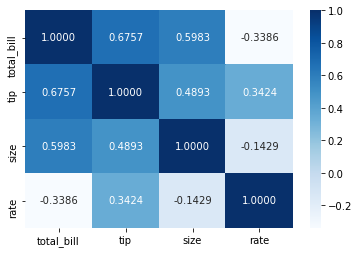

In [168]:
sns.heatmap(tips.corr(), annot=True, cmap='Blues',fmt='.4f') 
plt.show()
#size와 비율의 상관관계는 -0.1429로 약하게 음의 상관관계를 띄고 있다. 그 외의 것은 비율변수가 대금과 팁에 관한 비율 변수이므로 나머지는 
#해석 제외

In [174]:
#     np.corrcoef(tips['sex'],tips['rate'])
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   rate        244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.2 KB


In [192]:
tips.describe()

,total_bill,tip,size,rate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [248]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
rate          0
dtype: int64

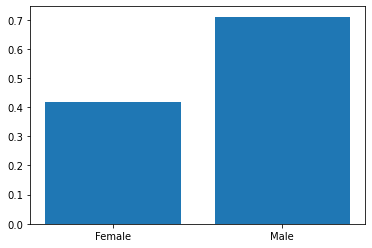

In [186]:
plt.bar(tips.sex,tips.rate)
plt.show() #성별로 따졌을 때 남성이 팁을 주는 비율이 높다

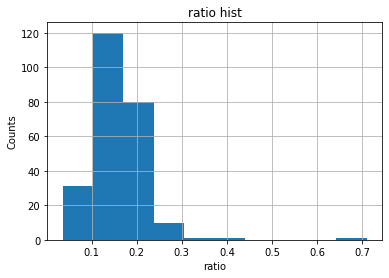

In [317]:
plt.hist(tips.rate)
plt.xlabel('ratio')
plt.ylabel('Counts')
plt.title('ratio hist')
plt.grid(True)
plt.show()   
# 대략 0.1~ 약 0.18사이의 비율이 가장 높다

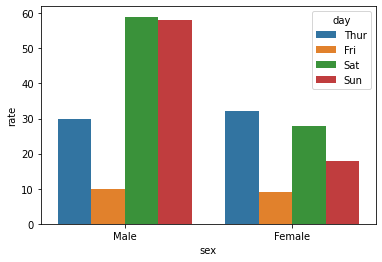

In [260]:
sns.barplot(x='sex',y='rate',estimator=len,hue='day',data= tips)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='rate'>

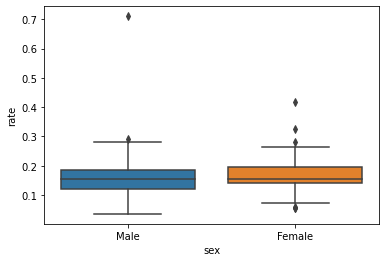

In [261]:
sns.boxplot(x='sex',y='rate',data=tips)

In [321]:
round(tips.groupby('sex').mean()[['rate']],2)

,rate
sex,
Male,0.16
Female,0.17


In [323]:
tips.groupby('sex').count()[['rate']]

,rate
sex,
Male,157
Female,87


<ipython-input-332-24f1078dfee2>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ra,labels=sex ,autopct='%.1f%%')


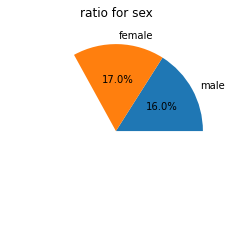

In [332]:
sex=['male','female']
ra=['0.16','0.17']
plt.pie(ra,labels=sex ,autopct='%.1f%%')
plt.title('ratio for sex')
plt.show()

In [309]:
round(tips.groupby('day').mean()[['rate']],2)

,rate
day,
Thur,0.16
Fri,0.17
Sat,0.15
Sun,0.17


<ipython-input-310-2409519b9ffc>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ra,labels=day ,autopct='%.1f%%')


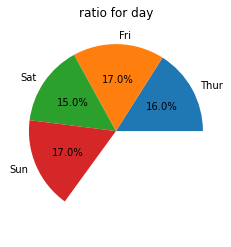

In [310]:
day=['Thur','Fri','Sat','Sun']
ra=['0.16','0.17','0.15','0.17']
plt.pie(ra,labels=day ,autopct='%.1f%%')
plt.title('ratio for day')
plt.show()

In [306]:
round(tips.groupby('smoker').mean()[['rate']],2)

,rate
smoker,
Yes,0.16
No,0.16


<ipython-input-308-ebb351dcb8e6>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ra,labels=sm ,autopct='%.1f%%')


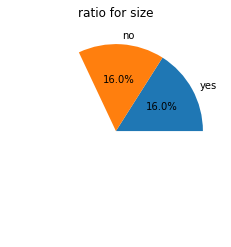

In [308]:
sm=['yes','no']
ra=['0.16','0.16']
plt.pie(ra,labels=sm ,autopct='%.1f%%')
plt.title('ratio for smoker')
plt.show()

In [304]:
round(tips.groupby('time').mean()[['rate']],2)

,rate
time,
Lunch,0.16
Dinner,0.16


<ipython-input-328-eff62bdbfdec>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ra,labels=ti)


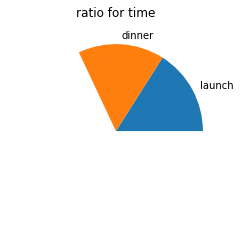

In [328]:
ti=['launch','dinner']
ra=['0.16','0.16']
plt.pie(ra,labels=ti ,autopct='%.1f%%')
plt.title('ratio for time')
plt.show()

In [300]:
round(tips.groupby('size').mean()[['rate']],2)

,rate
size,
1,0.22
2,0.17
3,0.15
4,0.15
5,0.14
6,0.16


<ipython-input-314-13e381d2f543>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ra,labels=si ,autopct='%.1f%%')


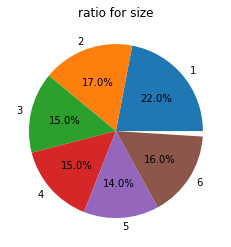

In [314]:
si=['1','2','3','4','5','6']
ra=['0.22','0.17','0.15','0.15','0.14','0.16']
plt.pie(ra,labels=si ,autopct='%.1f%%')
plt.title('ratio for size')
plt.show()

In [ ]:
sns.boxplot(x='day',y='tip',data=tips,hue='sex') # 성별을 기준으로 보여줌 위에 레전드 텍스트 값 표시
plt.show()